In [17]:
import pandas
import matplotlib.pyplot as plt
data = pandas.read_csv('train.csv')

for column in data:
    print (column)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [15]:
for i in data['Embarked']:

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


In [8]:
flag= False
for i in data['Survived']:
    if i not in [0,1]:
        print (i)
        flag = True
if flag == False:
    print ('No inconsistent data')

No inconsistent data


In [9]:
flag= False
for i in data['Pclass']:
    if i not in [1,2,3]:
        print (i)
        flag = True
if flag == False:
    print ('No inconsistent data')

No inconsistent data


In [10]:
flag= False
for i in data['Sex']:
    if i not in ['male','female']:
        print (i)
        flag = True
if flag == False:
    print ('No inconsistent data')

No inconsistent data


In [13]:
flag = False
for entry in data['Embarked']:
    if entry not in ('C','Q','S'):
        print (entry)
        flag = True
if flag == False:
    print ('No inconsistent data')
else:
    print ('inconsistent data')

nan
nan
inconsistent data


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
titanic_data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [21]:
missing_age = pandas.isnull(titanic_data['Age'])

In [23]:
titanic_data[missing_age].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


In [27]:
nm=titanic_data[missing_age]['Sex']=='male'
nf=titanic_data[missing_age]['Sex']=='female'
print (nm.sum())
print (nf.sum())

124
53


In [28]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
youngest_to_survive = titanic_data[titanic_data['Survived'] == 1]['Age'].min()
youngest_to_die = titanic_data[titanic_data['Survived'] == 0]['Age'].min()
oldest_to_survive = titanic_data[titanic_data['Survived'] == 1]['Age'].max()
oldest_to_die = titanic_data[titanic_data['Survived'] == 0]['Age'].max()

print ('Youngest_to_survive - ',youngest_to_survive)
print ('Youngest_to_die - ',youngest_to_die)
print ('Oldest_to_survive - ',oldest_to_survive)
print ('Oldest_to_die - ',oldest_to_die)

Youngest_to_survive -  0.42
Youngest_to_die -  1.0
Oldest_to_survive -  80.0
Oldest_to_die -  74.0


In [34]:
group_by_class_survival = titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size()
print (group_by_class_survival)



Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64


In [36]:
def survival(pclass, sex):
    group_by_class = titanic_data.groupby(['Pclass', 'Sex']).size()[pclass, sex].astype('float')
    group_by_class_survived = titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size()[pclass, 1, sex].astype('float')
    
    print ('Total numbers of',sex,'of class',pclass,'-',group_by_class)
    print ('Total numbers of',sex,'of class',pclass,'who survived -',group_by_class_survived)
    survival_rate = ((group_by_class_survived/group_by_class)*100).round(2)
    return survival_rate
    print ('\n\n')
    
print ('Effect of social economy in survival rate : \n')
print ('Class 1 - Male survival rate :\n',survival(1, 'male'),'%\n')
print ('Class 1 - Female survival rate \n:',survival(1, 'female'),'%\n')
print ('-------------\n')
print ('Class 2 - Male survival rate :\n',survival(2, 'male'),'%\n')
print ('Class 2 - Female survival rate:\n',survival(2, 'female'),'%\n')
print ('-------------\n')
print ('Class 3 - Male survival rate :\n',survival(3, 'male'),'%\n')
print ('Class 3 - Female survival rate :\n',survival(3, 'female'),'%\n')

Effect of social economy in survival rate : 

Total numbers of male of class 1 - 122.0
Total numbers of male of class 1 who survived - 45.0
Class 1 - Male survival rate :
 36.89 %

Total numbers of female of class 1 - 94.0
Total numbers of female of class 1 who survived - 91.0
Class 1 - Female survival rate 
: 96.81 %

-------------

Total numbers of male of class 2 - 108.0
Total numbers of male of class 2 who survived - 17.0
Class 2 - Male survival rate :
 15.74 %

Total numbers of female of class 2 - 76.0
Total numbers of female of class 2 who survived - 70.0
Class 2 - Female survival rate:
 92.11 %

-------------

Total numbers of male of class 3 - 347.0
Total numbers of male of class 3 who survived - 47.0
Class 3 - Male survival rate :
 13.54 %

Total numbers of female of class 3 - 144.0
Total numbers of female of class 3 who survived - 72.0
Class 3 - Female survival rate :
 50.0 %



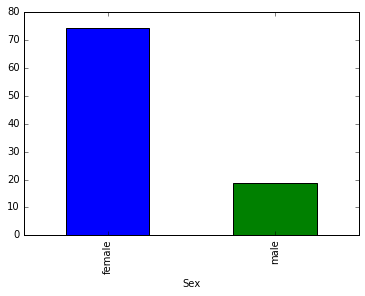

In [40]:
%matplotlib inline
titanic_data_survived = titanic_data
titanic_data_survived_grouped = titanic_data_survived.groupby(['Sex']).Survived.mean()*100
titanic_data_survived_grouped.plot(kind = 'bar')

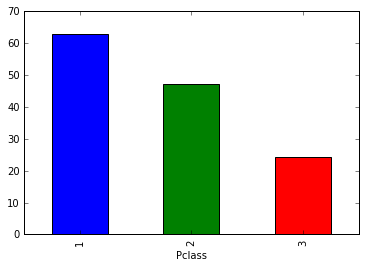

In [41]:
titanic_data_survived = titanic_data
titanic_data_survived_grouped = titanic_data_survived.groupby(['Pclass']).Survived.mean()*100
titanic_data_survived_grouped.plot(kind = 'bar')

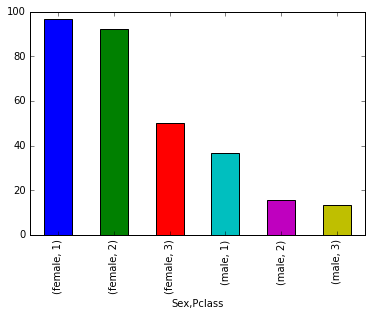

In [42]:
titanic_data_survived = titanic_data
titanic_data_survived_grouped = titanic_data_survived.groupby(['Sex', 'Pclass']).Survived.mean()*100
titanic_data_survived_grouped.plot(kind = 'bar')